In [155]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.3)
sns.set_style('white')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
from mouselab import *
from bayes_q import *
from gymrats.core import Agent
from exact import solve
from skopt import gp_minimize
from skopt.space import Real,Space

In [157]:
R = Categorical([-1, 1])
env = MouselabEnv(2, 2, reward=R, cost=.05)
q, v, pi, info = solve(env)
v(env.init)

1.04375

In [158]:
from skopt import gp_minimize

In [307]:
def create_training_df(env,N,prior_params=None):
    policy = BayesianQLearner(5,prior_params=prior_params)
    Q = policy.Q
    agent = Agent(env, policy)
    return pd.DataFrame(agent.run_many(N,pbar=False))

def meta_training_loss_single(x):
    N=10
    cost = np.random.uniform(0,0.5)
    env = MouselabEnv(2, 2, reward=R, cost=cost)
    df = create_training_df(env,N,prior_params=x)
    return -df.return_.values[-1]

def meta_training_loss(x):
    print(np.round(x,2))
    return np.mean([meta_training_loss_single(x) for _ in range(25)])

def train_meta_agent(N):
    x0 = list(np.r_[np.zeros(4) , 1, np.ones(4)*0.1, 100, 10,1])
    dimensions = [Real(-10,10)]*5 + [Real(0.1,100)]*5 + [Real(0.1,20)] + [Real(0.1,10)]
    return gp_minimize(lambda x: meta_training_loss(x),x0=x0,dimensions=dimensions,n_calls=N)

In [308]:
res = train_meta_agent(500)

[  0.    0.    0.    0.    1.    0.1   0.1   0.1   0.1 100.   10.    1. ]
[ 5.93  9.06  2.08  2.51  0.76  2.7  26.49 34.36 12.03 22.36  6.75  4.2 ]
[-7.88  8.83  9.95  3.79  7.57 29.72 99.15 40.78 59.72 25.39  2.53  0.21]
[ 7.89  5.54 -1.4   7.17 -6.46 33.34  8.16 89.83 44.54 50.39 18.79  3.27]
[-2.69  1.64  9.36 -6.45  2.98 75.26  4.95 80.26 14.66 81.61  7.81  1.04]
[ 1.72 -0.23 -6.89  3.17 -1.1  22.56 67.82 74.68 99.85 58.22 16.99  8.94]
[-2.19 -3.08 -9.49 -2.65  1.57 97.65  5.36 16.5  80.82 42.18  3.77  2.5 ]
[ 7.4  -7.85  2.49 -8.22 -5.59 87.8   5.37 24.32 11.3  91.15 12.65  9.7 ]
[ 8.99  1.71 -7.07 -7.17 -9.6  56.07 86.16 30.89  0.64 51.23 10.85  9.37]
[ 4.4   4.21  2.62 -7.6   9.9   8.73  5.37 38.25 36.94 55.86  3.04  1.39]
[-8.81 -6.18 -6.41 -2.16 -0.83 39.46 98.22 22.49 17.17 44.93  5.21  0.86]
[10.    9.84  5.22  4.64  0.49  4.07  0.1  28.24  0.1   0.1   5.42  5.81]
[  6.27  -1.29   1.15   4.39 -10.   100.    93.69  61.69   7.72 100.    15.6    2.01]
[ 7.16  4.82 -4.74  3.32  

[10.   -5.49 10.    3.45  8.94 53.2  71.86 95.02 74.49  0.1  18.09  7.91]
[ 10.    10.    10.     6.02  -9.67 100.    61.57   0.1    0.1    0.1    4.67   5.13]
[ 10.    10.    10.    10.    10.     0.1   82.95 100.    74.39   0.1    0.17  10.  ]
[10.   10.   10.   10.    8.72 35.54 79.16 95.65  0.1   0.1   4.6   9.31]
[10.   10.    5.54  5.83 10.    2.88 56.47 33.76 57.39  0.1  20.    9.42]
[10.   10.    5.26  5.74  6.47 90.48 56.01 33.8   0.1   0.1   2.58 10.  ]
[ 5.16 10.   10.    5.75 -3.61  0.1  66.5   4.98 77.79  0.1  20.   10.  ]
[ 10.   10.   10.   10.   10.    0.1 100.  100.  100.    0.1  20.   10. ]
[ 10.   10.   10.   10.   10.    0.1 100.    0.1   0.1   0.1   0.1   0.1]
[ 10.   10.   10.   10.   10.    0.1 100.  100.  100.    0.1  20.    0.1]
[  5.67  10.     5.25   6.3  -10.     0.1   54.05 100.    99.66   0.1   10.05   7.76]
[  5.71  10.     5.26   6.23  10.     0.1   54.25 100.     0.1    0.1   20.    10.  ]
[ 5.73 10.   10.    4.66  6.23 16.07 72.94 80.77  0.1   0.1  20.

[ 4.59 10.    1.13 10.    9.01  0.1  81.6  50.06 14.25 34.83  0.1  10.  ]
[ 4.18 10.    0.8  10.    7.11  0.1  86.46 65.41 20.25 36.73  0.1  10.  ]
[ 4.33 10.    1.21 10.   -7.58  0.1  85.28 32.99 32.93 30.8   0.1  10.  ]
[ 3.66 10.    1.11 10.   -9.03  0.1  95.69 23.15 32.73  0.1   0.1  10.  ]
[  3.28  10.     1.17  10.    -1.47   0.1  100.   100.    95.24  19.83   0.1   10.  ]
[ 6.21 10.    0.66 10.    8.68  0.1  65.82 54.39 32.24  0.1   0.1  10.  ]
[ 6.28 10.    0.82 10.   -4.51  0.1  66.4  11.83 53.9   0.1   0.1  10.  ]
[  6.17  10.     0.77  10.    10.     0.1   66.49  91.72 100.    16.8    0.1   10.  ]
[ 4.61 10.    3.78  6.64  7.82  0.1  67.37  0.1  28.28 85.3   0.1  10.  ]
[  5.81  10.     2.82  10.   -10.   100.    74.86   0.1   26.14   0.1    0.1   10.  ]
[10.   10.    2.8  10.    4.64  0.1  74.53 45.38 92.8  94.93  0.1  10.  ]
[ 10.    10.     2.96  10.    10.     0.1   75.98  69.5    0.1  100.     0.1   10.  ]
[ 8.03 10.    2.02 10.   -5.03  0.1  71.64 38.79 96.49 20.95  0.

[  6.48  10.     1.04   6.77 -10.     0.1   65.52 100.    16.     0.1    0.1   10.  ]
[  4.89  10.     3.39   5.9  -10.     0.1   53.97   0.1   55.42   1.52   8.39  10.  ]
[  7.1   10.     1.66   7.09  -8.66   0.1   70.89  26.29 100.   100.     0.1   10.  ]
[  7.01  10.     1.05   7.15  -1.62   0.1   68.34 100.   100.    22.14   0.1   10.  ]
[  7.01  10.     0.96   7.14  10.     0.1   70.13 100.   100.     0.1    0.1   10.  ]
[  7.07  10.     1.08   6.92   9.59   0.1   69.17   0.1  100.    83.55   0.1   10.  ]
[  7.32  10.     3.63   7.17 -10.     0.1   77.64 100.    31.25 100.     0.1   10.  ]
[  7.61  10.     3.37   7.18 -10.     0.1   77.45  77.17 100.    93.67   0.1   10.  ]
[  7.51  10.     2.85   7.18  10.     0.1   77.44  90.     0.1  100.     0.1   10.  ]
[  6.92  10.     3.58   7.64   3.38   0.1   72.01  15.05 100.   100.     0.1   10.  ]
[ 6.59 10.    4.47  7.83 10.    0.1  73.08  0.1  85.75 34.05  0.1  10.  ]
[  6.5   10.     4.71   7.52 -10.     0.1   73.09   0.1  100.    9

[ 10.     4.14   2.05  10.    -6.75   0.1  100.   100.   100.    42.86   0.1   10.  ]
[ 10.     4.23   1.76  10.    -9.6    0.1  100.    29.72  94.21  40.24   0.1   10.  ]
[1.000e+01 3.600e+00 3.860e+00 1.000e+01 2.000e-02 1.000e-01 1.000e+02 1.000e+02 9.018e+01 9.550e+00 1.000e-01 1.000e+01]
[  6.45   4.02   4.19  10.     1.04   0.1  100.   100.    13.11  31.36   0.1   10.  ]
[ 10.     3.15   2.27  10.     8.81   0.1  100.   100.    61.62  43.63   0.1    0.1 ]
[ 10.     4.4    3.15  10.    -2.05   0.1  100.   100.   100.    89.18   0.1   10.  ]
[  6.17   4.61   3.34  10.     2.7    0.1  100.   100.    81.13  67.19   0.1   10.  ]
[  5.35   4.28   3.84  10.     7.34   0.1  100.   100.   100.   100.     0.1   10.  ]
[  6.05   4.53   3.28  10.   -10.     0.1  100.   100.   100.    71.23   0.1   10.  ]
[ 10.     4.67   1.    10.    -5.63   0.1  100.   100.     3.64 100.     0.1   10.  ]
[ 10.     4.64   0.87  10.    -8.14   0.1  100.   100.    32.21 100.     0.1   10.  ]
[ 10.     4.52   0

KeyboardInterrupt: 

In [276]:
res.x

[3.930984039371996,
 -1.9147265562678193,
 -4.392857631601547,
 10.0,
 -10.0,
 0.1,
 18.969783583328127,
 4.381729610046885,
 59.15394263177038,
 51.19694447025303,
 0.1,
 3.8949280612598742]

In [137]:
def plot_weights(policy):
    W = np.stack(policy.weight_log)
    plt.plot(W)

In [138]:
num_steps = 200
num_replications = 10
dfs = [create_training_df(num_steps) for _ in range(num_replications)]

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 189.36it/s]


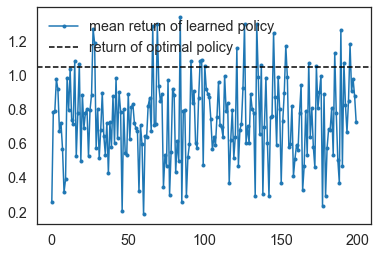

In [139]:
returns = np.array([df.return_ for df in dfs])
plt.plot(np.mean(returns,axis=0),'.-',label='mean return of learned policy')
#plt.plot(pd.DataFrame(np.mean(returns,axis=0)).rolling(10).mean(),'.-',label='mean return of learned policy')
plt.axhline(v(env.init),color='black',linestyle='dashed',label='return of optimal policy')
plt.legend(frameon=False)
plt.show()

#plt.show()
#df.n_steps.rolling(1).mean().plot()
#plt.show()